In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
gray=cv2.imread(r"C:\Users\hp\Downloads\gray.jpg",0)

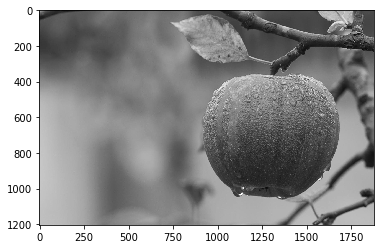

In [3]:
plt.imshow(gray,cmap='gray')

# Image Histograms

In [83]:
def hist(img):
    hist=np.zeros((256))
    for col in img:
        for j in col:
            hist[int(j)]+=1.0
    return hist

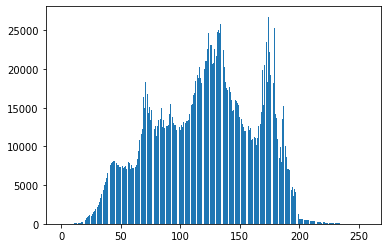

In [84]:
plt.bar(np.arange(256),hist(gray))
plt.show()

# Point Pixel Operation

In [39]:
def negative(img):
    neg_img=np.zeros(img.shape,"float64")
    for i in range(len(img)):
        for j in range(len(img[i])):
            neg_img[i][j]=255-img[i][j]
    return neg_img

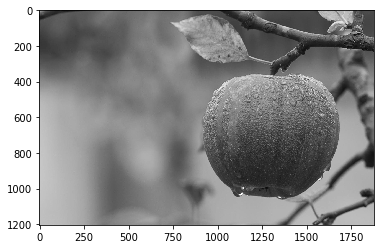

In [38]:
plt.imshow(img,cmap='gray')

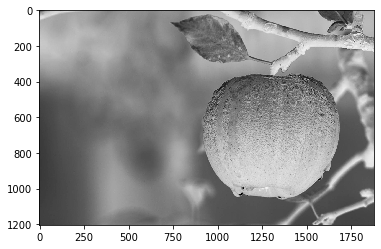

In [40]:
plt.imshow(negative(img),cmap='gray')

In [48]:
def threshold(img,threshold=128):
    new_img=np.zeros(img.shape,"float64")
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j]<threshold:
                new_img[i][j]=0
            else:
                new_img[i][j]=255
    return new_img

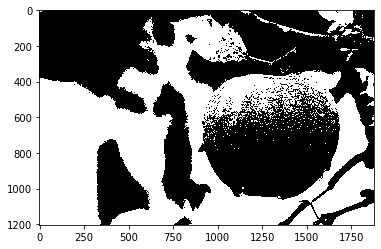

In [49]:
plt.imshow(threshold(gray),cmap='gray')

In [50]:
def gamma(img,gamma=0.6):
    new_img=np.zeros(img.shape,"float64")
    for i in range(len(img)):
        for j in range(len(img[i])):
            new_img[i][j]=((img[i][j]/255.0)**gamma)*255.0
    return new_img

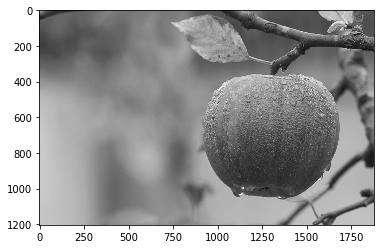

In [58]:
plt.imshow(gamma(gray,gamma=0.9),cmap="gray")

In [5]:
def transformation(img):
    new_img=np.zeros(img.shape,"float64")
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j]>=80 and img[i][j]<=131:
                new_img[i][j]=(255/50)*(img[i][j]-80)
    return new_img

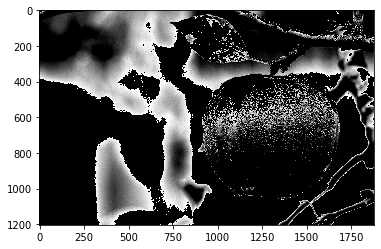

In [62]:
plt.imshow(transformation(gray),cmap='gray')

# Histogram & Cummulative histogram distribution 

In [13]:
def imhist_cumhist(img):
    h,w=img.shape
    hist1=hist(img)
    cdf=np.zeros((256))
    cdf[0]=hist1[0]
    for i in range(1,len(hist1)):
        cdf[i]=cdf[i-1]+hist1[i]
    return hist1,cdf

In [14]:
hist1,cdf=imhist_cumhist(gray)

In [15]:
hist1.shape

(256,)

<BarContainer object of 256 artists>

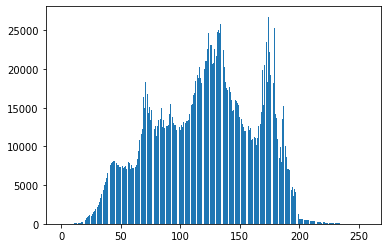

In [16]:
x=np.arange(256)
plt.bar(x,hist1)

<BarContainer object of 256 artists>

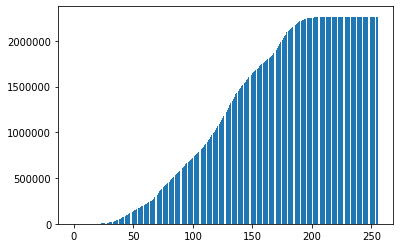

In [17]:
plt.bar(x,cdf)

# Histogram Equalization

In [58]:
def imhisteq(img):
    h,w=img.shape
    hist1=hist(img)
    cdf=np.zeros((256))
    cdf[0]=hist1[0]
    for i in range(1,len(hist1)):
        cdf[i]=cdf[i-1]+hist1[i]
    hist1=hist1/(h*w)
    cdf=cdf*255/(h*w)
    return hist1,cdf

In [69]:
def transformation(img,tx):
    w,h=img.shape
    new_img=np.zeros(img.shape)
    for i in range(w):
        for j in range(h):
            new_img[i][j]=int(tx[img[i][j]])
    return new_img

In [70]:
int(5.5)

5

In [71]:
hist1,cdf=imhisteq(gray)

In [72]:
hcimage=transformation(gray,cdf)

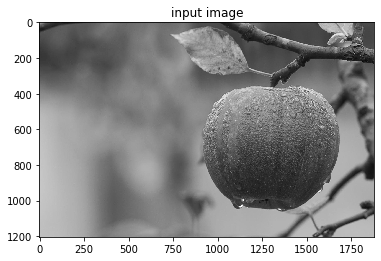

In [73]:
plt.title("input image")
plt.imshow(gray,cmap="gray")

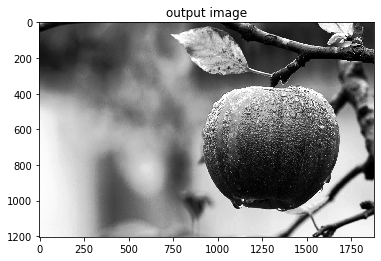

In [74]:
plt.title("output image")
plt.imshow(hcimage,cmap="gray")

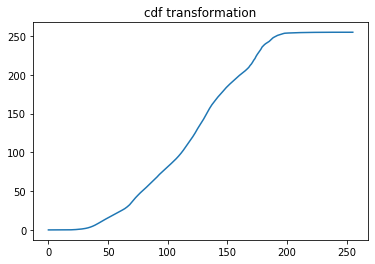

In [75]:
plt.title("cdf transformation")
plt.plot(np.arange(256),cdf)

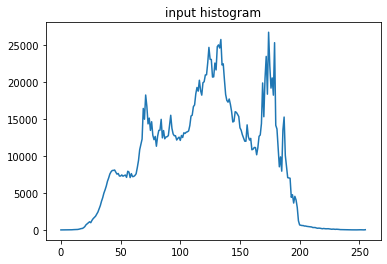

In [85]:
plt.title("input histogram")
plt.plot(hist(gray))

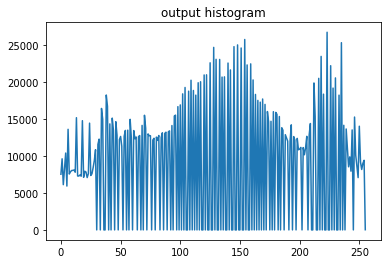

In [88]:
plt.title("output histogram")
plt.plot(hist(hcimage))

<BarContainer object of 256 artists>

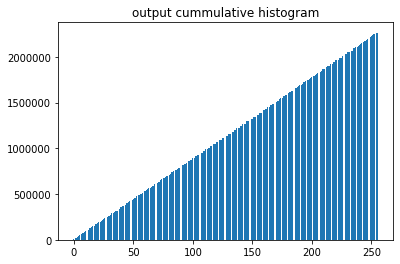

In [92]:
plt.title("output cummulative histogram")
plt.bar(np.arange(256),imhist_cumhist(hcimage)[1])

<BarContainer object of 256 artists>

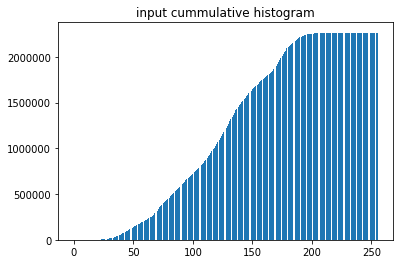

In [93]:
plt.title("input cummulative histogram")
plt.bar(np.arange(256),imhist_cumhist(gray)[1])